<a href="https://colab.research.google.com/github/rlfwo93/C-/blob/main/20161508replace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모듈 불러오기**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
tf.__version__

'2.3.0'

# **엑셀 불러오기**

In [2]:
brain = pd.read_excel("duih_dfa.xlsx")

In [3]:
print(brain)

        Group       Fp1        F7  ...        C4        P4        O2
0      NonCZP  0.453575  0.564042  ...  0.750381  0.513921  0.388215
1      NonCZP  0.468788  0.464526  ...  1.365283  0.246469  0.480016
2      NonCZP  0.761824  0.713902  ...  1.070519  0.763317  0.728678
3      NonCZP  0.320513  1.041483  ...  0.869266  0.306688  0.469720
4      NonCZP  0.550035  0.642381  ...  0.830093  0.627568  0.961302
...       ...       ...       ...  ...       ...       ...       ...
31075     CZP  0.852304  0.765143  ...  0.199074  0.866088  0.537417
31076     CZP  0.788118  0.677485  ...  1.003391  0.642248  0.504024
31077     CZP  0.890973  0.538311  ...  0.865412  0.660497  0.955419
31078     CZP  1.279263  1.172636  ...  1.302551  1.473136  1.106737
31079     CZP  0.474424  0.668689  ...  0.504502  1.129228  0.543831

[31080 rows x 19 columns]


# **손실값 파악**

In [4]:
brain.isnull().sum()

Group     0
Fp1       7
F7       33
T3       55
T5       55
F3       32
C3       26
P3       32
O1       37
Fz       20
Pz       27
Fp2      28
F8       43
T4       13
T6       25
F4       37
C4       41
P4       21
O2       38
dtype: int64

# **결측값을 평균값으로 대체**

In [5]:
brainre=brain.fillna(0.717008)
brainre

,Group,Fp1,F7,T3,T5,F3,C3,P3,O1,Fz,Pz,Fp2,F8,T4,T6,F4,C4,P4,O2
0,NonCZP,0.453575,0.564042,0.556784,0.637439,0.209537,0.800940,0.761023,0.747436,0.305095,0.564888,0.745528,0.659783,0.387473,0.335281,0.530255,0.750381,0.513921,0.388215
1,NonCZP,0.468788,0.464526,0.556084,0.362510,0.500104,0.614666,0.321130,1.069956,0.454957,0.712725,0.355890,0.498773,0.142149,0.323086,0.364096,1.365283,0.246469,0.480016
2,NonCZP,0.761824,0.713902,0.551635,0.799061,0.718088,0.556565,1.247161,0.724326,0.917388,0.352680,0.891987,0.426286,0.314502,0.636114,1.107768,1.070519,0.763317,0.728678
3,NonCZP,0.320513,1.041483,0.562281,0.460085,0.463860,0.081854,0.838522,0.223370,0.686811,0.581258,0.481063,0.330527,0.372371,0.310489,0.461525,0.869266,0.306688,0.469720
4,NonCZP,0.550035,0.642381,1.062290,0.865921,0.905292,0.820959,0.585278,0.339363,0.760805,1.089401,0.509570,0.655549,0.901712,0.765397,0.875171,0.830093,0.627568,0.961302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31075,CZP,0.852304,0.765143,0.681175,0.384575,0.699496,0.866565,0.544377,0.405061,0.296469,1.106938,0.612169,0.288407,0.585331,0.844580,0.680941,0.199074,0.866088,0.537417
31076,CZP,0.788118,0.677485,0.627501,0.689511,0.740181,0.655981,0.743361,0.677243,0.661745,0.581599,0.843679,0.649858,0.901267,0.679429,0.806627,1.003391,0.642248,0.504024
31077,CZP,0.890973,0.538311,0.547298,0.673904,0.874004,0.924029,0.511788,0.882989,0.957397,0.583462,0.843166,0.604823,0.701230,0.720206,0.926973,0.865412,0.660497,0.955419
31078,CZP,1.279263,1.172636,0.697928,0.286166,1.107689,0.588270,1.001763,0.624696,0.886751,1.440829,0.862042,0.840432,0.975955,0.984204,0.720300,1.302551,1.473136,1.106737


# **결측값을 제거한 것과 안한것 시각적 비교**

In [6]:
#원래의 값
brain.isnull().sum()


Group     0
Fp1       7
F7       33
T3       55
T5       55
F3       32
C3       26
P3       32
O1       37
Fz       20
Pz       27
Fp2      28
F8       43
T4       13
T6       25
F4       37
C4       41
P4       21
O2       38
dtype: int64

In [7]:
#손실값을 평균값으로 대체
brainre.isnull().sum()

Group    0
Fp1      0
F7       0
T3       0
T5       0
F3       0
C3       0
P3       0
O1       0
Fz       0
Pz       0
Fp2      0
F8       0
T4       0
T6       0
F4       0
C4       0
P4       0
O2       0
dtype: int64

# **데이터 준비**

In [8]:
data = brainre.iloc[0:,1:]
data


,Fp1,F7,T3,T5,F3,C3,P3,O1,Fz,Pz,Fp2,F8,T4,T6,F4,C4,P4,O2
0,0.453575,0.564042,0.556784,0.637439,0.209537,0.800940,0.761023,0.747436,0.305095,0.564888,0.745528,0.659783,0.387473,0.335281,0.530255,0.750381,0.513921,0.388215
1,0.468788,0.464526,0.556084,0.362510,0.500104,0.614666,0.321130,1.069956,0.454957,0.712725,0.355890,0.498773,0.142149,0.323086,0.364096,1.365283,0.246469,0.480016
2,0.761824,0.713902,0.551635,0.799061,0.718088,0.556565,1.247161,0.724326,0.917388,0.352680,0.891987,0.426286,0.314502,0.636114,1.107768,1.070519,0.763317,0.728678
3,0.320513,1.041483,0.562281,0.460085,0.463860,0.081854,0.838522,0.223370,0.686811,0.581258,0.481063,0.330527,0.372371,0.310489,0.461525,0.869266,0.306688,0.469720
4,0.550035,0.642381,1.062290,0.865921,0.905292,0.820959,0.585278,0.339363,0.760805,1.089401,0.509570,0.655549,0.901712,0.765397,0.875171,0.830093,0.627568,0.961302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31075,0.852304,0.765143,0.681175,0.384575,0.699496,0.866565,0.544377,0.405061,0.296469,1.106938,0.612169,0.288407,0.585331,0.844580,0.680941,0.199074,0.866088,0.537417
31076,0.788118,0.677485,0.627501,0.689511,0.740181,0.655981,0.743361,0.677243,0.661745,0.581599,0.843679,0.649858,0.901267,0.679429,0.806627,1.003391,0.642248,0.504024
31077,0.890973,0.538311,0.547298,0.673904,0.874004,0.924029,0.511788,0.882989,0.957397,0.583462,0.843166,0.604823,0.701230,0.720206,0.926973,0.865412,0.660497,0.955419
31078,1.279263,1.172636,0.697928,0.286166,1.107689,0.588270,1.001763,0.624696,0.886751,1.440829,0.862042,0.840432,0.975955,0.984204,0.720300,1.302551,1.473136,1.106737


In [9]:
print("data.shape = {0}".format(data.shape))

data.shape = (31080, 18)


In [11]:
target = brainre.iloc[0:,0:1]
target

,Group
0,NonCZP
1,NonCZP
2,NonCZP
3,NonCZP
4,NonCZP
...,...
31075,CZP
31076,CZP
31077,CZP
31078,CZP


In [12]:
print("target.shape = {0}".format(target.shape))

target.shape = (31080, 1)


In [13]:
x_train,y_train,x_test, y_test = train_test_split(data, target, test_size=0.25, random_state=20161508)

In [14]:
print("x_train.shape = {0}".format(x_train.shape))
print("x_test.shape = {0}".format(x_test.shape))
print("y_train.shape = {0}".format(y_train.shape))
print("y_test.shape = {0}".format(y_test.shape))

x_train.shape = (23310, 18)
x_test.shape = (23310, 1)
y_train.shape = (7770, 18)
y_test.shape = (7770, 1)


In [15]:
x_test = x_test.replace("NonCZP",0)
x_test = x_test.replace("CZP",1)
x_test

,Group
7294,0
30524,1
2793,0
12964,0
15627,0
...,...
17590,0
2017,0
7291,0
8682,0


In [16]:
y_test = y_test.replace("NonCZP",0)
y_test = y_test.replace("CZP",1)

y_test

,Group
15718,0
14858,0
20449,1
13595,0
9239,0
...,...
22790,1
20910,1
19151,1
10701,0


# **넘파이로 형변환**

In [94]:
x_train = x_train.to_numpy()
x_test= x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# **KNeighborsClassifier**

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
knn.score(y_train,y_test)

0.5517374517374517

In [97]:
result = knn.predict(x_train)

In [98]:
result.shape

(23310,)

In [34]:
if result[23309] == 0 :
  print("NonCZP")
else:
  print("CZP")

CZP


# **3층 DNN모듈**

In [100]:
three = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(2, 9)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(2, activation='softmax')
])

three.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **DNN모델 구조확인**

In [101]:
three.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 18)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               4864      
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 258       
Total params: 38,018
Trainable params: 38,018
Non-trainable params: 0
_________________________________________________

# **DNN모듈 학습**

In [102]:
histoy=three.fit(x_train,x_test,epochs=20, batch_size=32)

Epoch 1/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6724 - accuracy: 0.5970
Epoch 2/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6676 - accuracy: 0.5983
Epoch 3/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6661 - accuracy: 0.5992
Epoch 4/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6647 - accuracy: 0.5987
Epoch 5/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6635 - accuracy: 0.5977
Epoch 6/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6613 - accuracy: 0.5999
Epoch 7/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6609 - accuracy: 0.6008
Epoch 8/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6601 - accuracy: 0.6020
Epoch 9/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6593 - accuracy: 0.6043
Epoch 10/20
729/729 [==============================] - 1s 2ms/step - loss: 0.6578 - accuracy: 0.6046

# **DNN 모듈 평가**

In [103]:
three.evaluate(y_train,y_test)

243/243 [==============================] - 0s 975us/step - loss: 0.7103 - accuracy: 0.5846


[0.710304856300354, 0.584555983543396]

# **예측하기**

In [130]:
result = three.predict(x_train)

if result[15000].argmax() == 0 :
  print("NonCZP")
else:
  print("CZP")

CZP


# **학습 시각화 그래프**

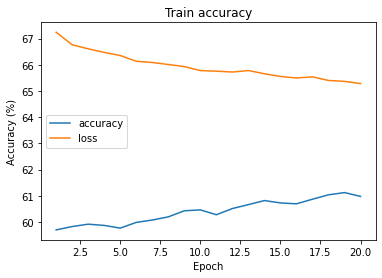

In [105]:
acc_list = [100 * i for i in histoy.history['accuracy']]
loss_list = [100 * i for i in histoy.history['loss']]


plt.plot(range(1,20+1),acc_list)  
plt.plot(range(1,20+1),loss_list)  
plt.title('Train accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='center left')